James Kostal <br>
Program built to graph results for parts b, c, and d of question 4.50 on homework 4 of graduate thermodynamics <br>
To begin I will build in my results from part a

In [1]:
#imports
import matplotlib.pyplot as plt
import numpy as np

In [37]:
#use natural units to define constants
hbar = 1 #reduced Planck's constant
omega = 1 #angular frequency
k_b = 1 #Boltzmann's constant

#define functions to calculate mean energy per particle from book and heat capacity found on paper
def average_energy(B):
    E_N = (0.5*hbar*omega+(hbar*omega)/(np.exp(B*hbar*omega)-1))
    return E_N

def heat_capacity(B):
    Cv_Nkb = ((B*hbar*omega)**2*np.exp(B*hbar*omega))/((np.exp(B*hbar*omega)-1)**2)
    return Cv_Nkb

B) Plot the T-dependence of the mean energy per particle $E/N$ and the specific heat $C_v$. Show that $E/N$ &rarr; $kT$ at high temperature for which $kT$ >> $\hbar \omega$. <br>

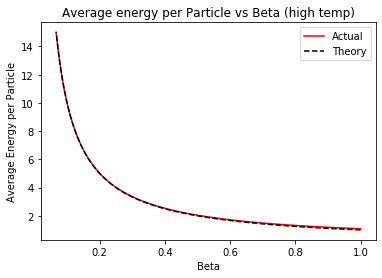

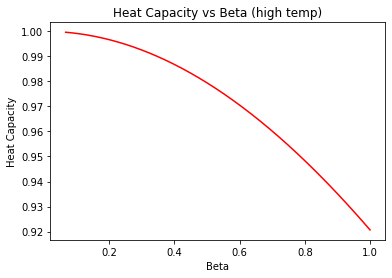

In [64]:
#use a linspace to make hot temps
hot_temp = np.linspace(1,15,100000)
hot_beta = [1/(k_b*T) for T in hot_temp]

#calculate theory line for energy per particle, thanks to Tucker's in class presentation on random walks
#for inspiring the idea of a theory line.
theory_E_N_hot = [1/(k_b*B) for B in hot_beta]

#calculate our result
real_E_N_hot = [average_energy(B) for B in hot_beta]
Cv_hot = [heat_capacity(B) for B in hot_beta]

#graph results
plt.plot(hot_beta, real_E_N_hot, color='r', label = 'Actual')
plt.plot(hot_beta, theory_E_N_hot, color='black', linestyle = 'dashed', label = 'Theory')
plt.ylabel('Average Energy per Particle')
plt.xlabel('Beta')
plt.title('Average energy per Particle vs Beta (high temp)')
plt.legend(loc="upper right")
plt.show()
plt.plot(hot_beta, Cv_hot, color='r', label = 'Actual')
plt.ylabel('Heat Capacity')
plt.xlabel('Beta')
plt.title('Heat Capacity vs Beta (high temp)')
plt.show()

We see that for high tempertures $kT = 1/\beta$ is a good approximation.

C) Show that at low temperatures for $\hbar \omega >> kT$, $E/N = \hbar \omega(1/2+e^{-\beta\hbar\omega})$. What is the value of the heat capacity? Why is the latter so much smaller than it is in the high temperature limit? Why is the behavior different from that of a two-state system?

As found on paper in the low temperature limit the heat capacity should approach $kN(\beta\hbar\omega)^2/e^{\beta\hbar\omega}$

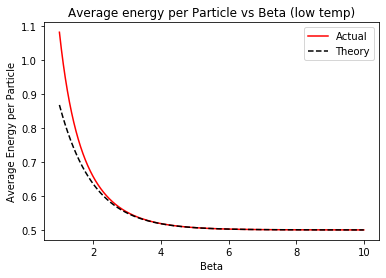

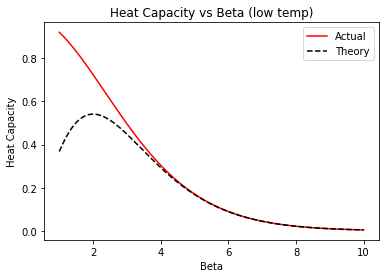

In [65]:
#use a linspace to make cold temps
cold_temp = np.linspace(1,0.1,100000)
cold_beta = [1/(k_b*T) for T in cold_temp]

#theory lines
theory_E_N_cold = [hbar*omega*(0.5+np.exp(-B*hbar*omega)) for B in cold_beta]
theory_Cv_cold = [(k_b*(B*hbar*omega)**2)/(np.exp(B*hbar*omega)) for B in cold_beta]

#calculate our result
real_E_N_cold = [average_energy(B) for B in cold_beta]
real_Cv_cold = [heat_capacity(B) for B in cold_beta]

#graph results
plt.plot(cold_beta, real_E_N_cold, color='r', label = 'Actual')
plt.plot(cold_beta, theory_E_N_cold, color='black', linestyle = 'dashed', label = 'Theory')
plt.ylabel('Average Energy per Particle')
plt.xlabel('Beta')
plt.title('Average energy per Particle vs Beta (low temp)')
plt.legend(loc="upper right")
plt.show()
plt.plot(cold_beta, real_Cv_cold, color='r', label = 'Actual')
plt.plot(cold_beta, theory_Cv_cold, color='black', linestyle = 'dashed', label = 'Theory')
plt.ylabel('Heat Capacity')
plt.xlabel('Beta')
plt.title('Heat Capacity vs Beta (low temp)')
plt.legend(loc="upper right")
plt.show()

We see that the expected results for both $E/N = \hbar \omega(1/2+e^{-\beta\hbar\omega})$ and $C_v = kN(\beta\hbar\omega)^2/e^{\beta\hbar\omega}$ are good approximations at low temperatures.<br>
As the average energy of the system goes down less energy is needed to increase the average energy of the system, thus the heat capacity decreases at low temperature. <br>
In a two-state system there are only two avaialble energies and so the heat capacity is more restricted because the system's energy is restricted, hence why over a range of energies the heat capacity takes a different form.

D) Verify that $S$ &rarr; $0$ as $T$ &rarr; $0$ in agreement with the third law of thermodynamics, and that at high T, $S$ &rarr; $kN\ln(kT/\hbar\omega)$.

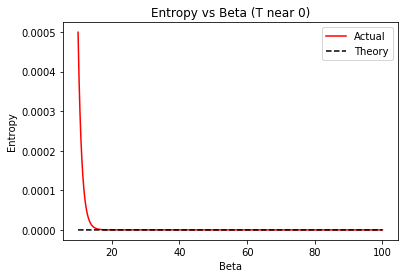

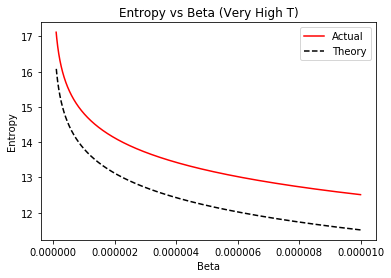

In [75]:
#need to define entropy using 4.131 from the book
def entropy(B):
    s_N = k_b*(B*hbar*omega/(np.exp(B*hbar*omega)-1)-np.log(1-np.exp(-B*hbar*omega)))
    return s_N

#use a linspace to make super low and super high temps
very_cold_temp = np.linspace(0.1,0.01,100000)
very_cold_beta = [1/(k_b*T) for T in very_cold_temp]
very_hot_temp = np.linspace(100000,10000000,100000)
very_hot_beta = [1/(k_b*T) for T in very_hot_temp]

#theory lines
theory_S_cold = [0 for B in very_cold_beta]
theory_S_hot = [k_b*np.log(1/(hbar*omega*B)) for B in very_hot_beta]

#calculate our result
real_S_cold = [entropy(B) for B in very_cold_beta]
real_S_hot = [entropy(B) for B in very_hot_beta]

plt.plot(very_cold_beta, real_S_cold, color='r', label = 'Actual')
plt.plot(very_cold_beta, theory_S_cold, color='black', linestyle = 'dashed', label = 'Theory')
plt.ylabel('Entropy')
plt.xlabel('Beta')
plt.title('Entropy vs Beta (T near 0)')
plt.legend(loc="upper right")
plt.show()
plt.plot(very_hot_beta, real_S_hot, color='r', label = 'Actual')
plt.plot(very_hot_beta, theory_S_hot, color='black', linestyle = 'dashed', label = 'Theory')
plt.ylabel('Entropy')
plt.xlabel('Beta')
plt.title('Entropy vs Beta (Very High T)')
plt.legend(loc="upper right")
plt.show()

We see good agreement with the expected results for entropy in both limits. For temperatures near zero we see exactly what was expected and for very high temperatures we see similar forms in both lines.